In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [53]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [54]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [56]:
df.duplicated().sum()

0

In [57]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [58]:
df=pd.get_dummies(df,drop_first=True,columns=['Geography','Gender'])

In [59]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [60]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [61]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [62]:
X=df.drop(columns=['Exited'])

In [63]:
X.shape

(10000, 11)

In [64]:
df.shape

(10000, 12)

In [65]:
y=df['Exited']

In [66]:
y.shape

(10000,)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaled=StandardScaler()

In [72]:
X_train_scaled=scaled.fit_transform(X_train)

In [73]:
X_train_scaled.shape

(8000, 11)

In [74]:
X_train_scaled

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [75]:
X_test_scaled=scaled.transform(X_test)

In [76]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [77]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [80]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.6084 - accuracy: 0.6967 - val_loss: 0.4954 - val_accuracy: 0.8031
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4744 - accuracy: 0.7977 - val_loss: 0.4458 - val_accuracy: 0.8112
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.8052 - val_loss: 0.4249 - val_accuracy: 0.8219
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8102 - val_loss: 0.4113 - val_accuracy: 0.8219
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8183 - val_loss: 0.4011 - val_accuracy: 0.8288
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8252 - val_loss: 0.3912 - val_accuracy: 0.8356
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3949 - accuracy: 0.8353 - val_loss: 0.3778 - val_accuracy: 0.8413

In [81]:
history.history

{'loss': [0.6083588600158691,
  0.4744291305541992,
  0.4445159137248993,
  0.4292067587375641,
  0.41833430528640747,
  0.4070870280265808,
  0.39490342140197754,
  0.3820017874240875,
  0.3693370521068573,
  0.36121508479118347,
  0.355011910200119,
  0.3511931300163269,
  0.3480236530303955,
  0.3457856774330139,
  0.34465649724006653,
  0.3428306579589844,
  0.3417038321495056,
  0.34103670716285706,
  0.3401295840740204,
  0.3394392728805542,
  0.3386906087398529,
  0.33824101090431213,
  0.3371601402759552,
  0.3370690643787384,
  0.33678150177001953,
  0.336159348487854,
  0.33594295382499695,
  0.3354879319667816,
  0.3350009620189667,
  0.33465707302093506,
  0.3352510333061218,
  0.3340723514556885,
  0.334048867225647,
  0.33427363634109497,
  0.33303290605545044,
  0.33280444145202637,
  0.33289146423339844,
  0.33242538571357727,
  0.3317967355251312,
  0.33209532499313354,
  0.3319362998008728,
  0.33132404088974,
  0.3312026262283325,
  0.3307713270187378,
  0.3306099772

In [82]:
import matplotlib.pyplot as plt

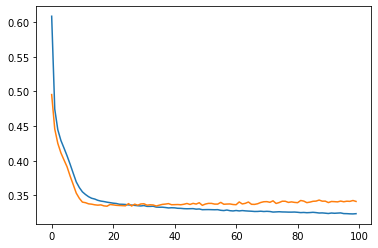

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

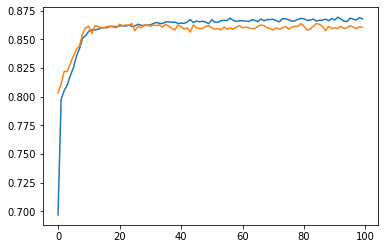

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [87]:
from sklearn.metrics import r2_score,accuracy_score

In [88]:
y_log=model.predict(X_test_scaled)

In [89]:
y_pred=np.where(y_log>0.5,1,0)

In [92]:
r2_score(y_test,y_pred)

0.05701658778868779

In [93]:
accuracy_score(y_pred,y_test)

0.854